# Vamos a clasificar entre estrellas, cuásares y Galaxias

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from math import floor
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
np.random.seed(10)
import sklearn.metrics
import seaborn as cns

In [2]:
def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1, será el porcentaje que mandará a entrenamiento
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val

In [3]:
estelares = pd.read_csv('https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/data/Skyserver_SQL2_27_2018%206_51_39%20PM.csv')

Este dataset cuenta con 10000 datos de observaciones astronómicas correspondientes a distintos cuerpos celestes: $\textbf{Galaxias}$,$\textbf{QSO}$ y $\textbf{Estrellas}$, nosotros trabajaremos con los siguientes parámetros:

#  ra
Que se refiere a la ascensión recta

# dec
La declinación

# Los ajustes a las coordenadas Thuan-Gunn u,g,r,i,z
Que se relacionan con las bandas de paso del objeto

# Los parámetros propios de la imágen
# run
Que representa la exploración específica realizada

# camcol
Del 1 al 6 cuantifica la búsqueda en el recorrido del objeto

# rerun
Indica cómo fue procesada la imagen

# field
va de 0 a 800(recorrido más largo) y cuantifica el recorrido

# Redshift

# plate
número de la bandeja, propia del espectroscopio utilizado

# mjd
Fecha juliana modificada en la que se tomó la foto

# fiberid
identifica las fibras del espectrógrafo

In [4]:
datos=estelares.loc[:,'ra':'fiberid'];datos

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


##### Haremos los vectores one-hot como sigue:
[star, galaxy, qso]

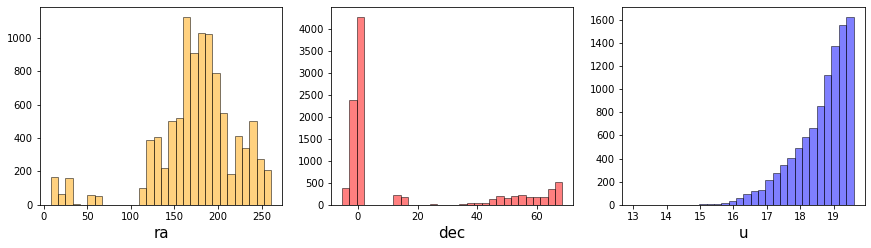

In [5]:
  plt.figure(figsize=(20,8)) 

#ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

#ax1.hist(estelares.objid, bins=30, color='green',edgecolor='black', alpha=0.5)
#ax1.set_xlabel('onjid', size=15)

ax2.hist(estelares.ra, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('ra', size=15)

ax3.hist(estelares.dec, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('dec', size=15)

ax4.hist(estelares.u, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('u', size=15);

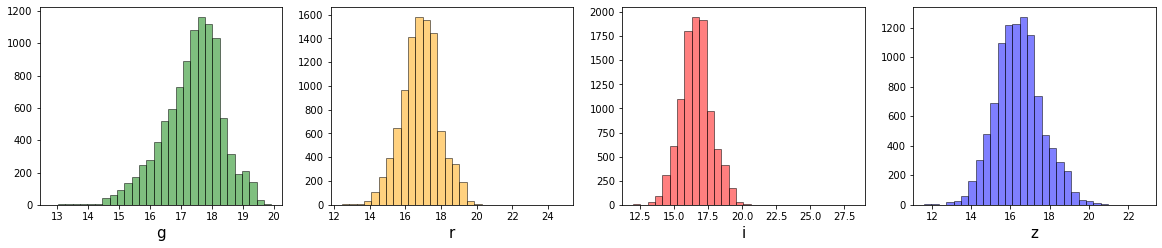

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.g, bins=30, color='green',edgecolor='black', alpha=0.5)
ax1.set_xlabel('g', size=15)

ax2.hist(estelares.r, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('r', size=15)

ax3.hist(estelares.i, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('i', size=15)

ax4.hist(estelares.z, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('z', size=15);

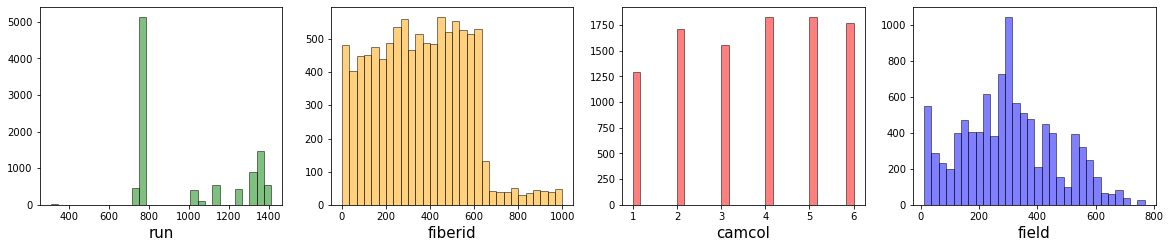

In [7]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.run, bins=30, color='green',edgecolor='black', alpha=0.5)
ax1.set_xlabel('run', size=15)

ax2.hist(estelares.fiberid, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('fiberid', size=15)

ax3.hist(estelares.camcol, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('camcol', size=15)

ax4.hist(estelares.field, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('field', size=15);

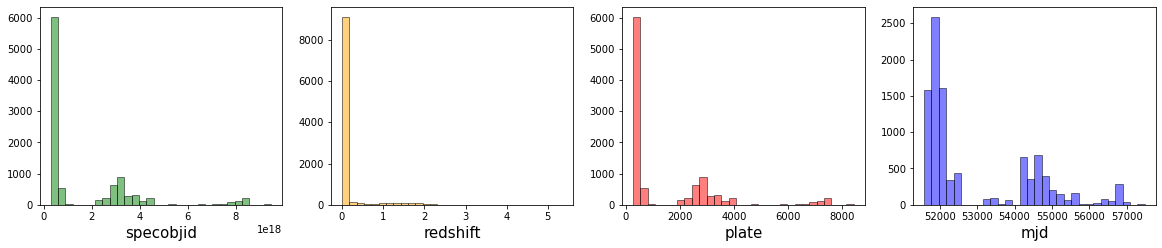

In [8]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.specobjid, bins=30, color='green',edgecolor='black', alpha=0.5)
ax1.set_xlabel('specobjid', size=15)

ax2.hist(estelares.redshift, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('redshift', size=15)

ax3.hist(estelares.plate, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('plate', size=15)

ax4.hist(estelares.mjd, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('mjd', size=15);

In [9]:
clases=[]
for i in datos['class']:
    if i=='STAR': clases.append([1,0,0])
    if i=='GALAXY': clases.append([0,1,0])
    if i=='QSO': clases.append([0,0,1])
        
clases=np.array(clases);clases

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [10]:
galaxy = estelares[estelares["class"]=="GALAXY"]
star = estelares[estelares["class"]=="STAR"]
quasar = estelares[estelares["class"]=="QSO"]

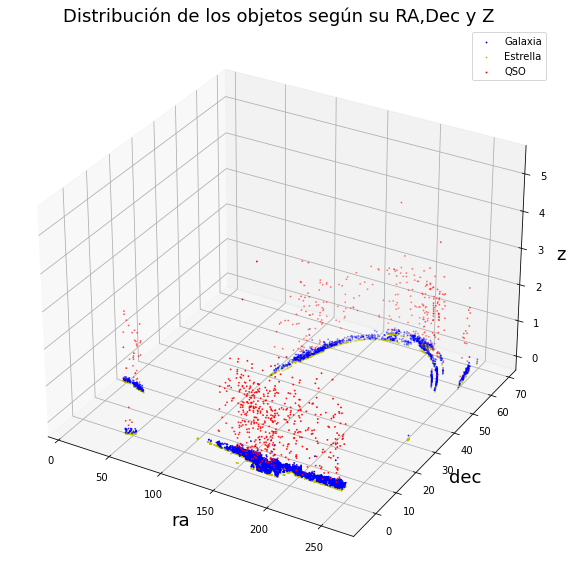

In [11]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['ra'],galaxy['dec'],galaxy['redshift'], s = 0.7, color = 'b', label = 'Galaxia')
ax.scatter(star['ra'],star['dec'],star['redshift'], s = 0.7, color = 'y', label = 'Estrella')
ax.scatter(quasar['ra'],quasar['dec'],quasar['redshift'], s = 0.7, color = 'r', label = 'QSO')
ax.set_xlabel('ra',fontsize=18)
ax.set_ylabel('dec',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.set_title('Distribución de los objetos según su RA,Dec y Z',fontsize=18)
plt.legend()
plt.show()

# Vamos prescindir de la variable cobjid y de rerun

In [12]:
datos=datos.drop({'class','rerun'}, axis=1)
datos

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


# Estandarizamos el conjunto

In [13]:
X=(datos-datos.mean())/datos.std()

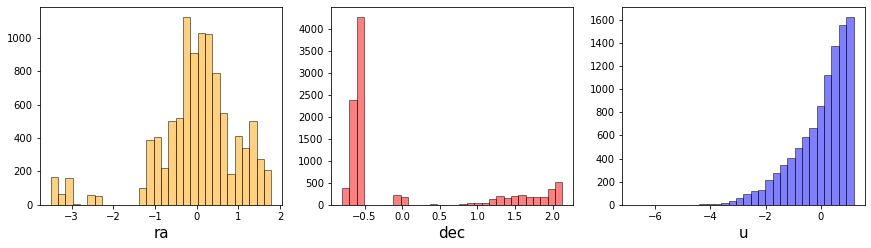

In [14]:
 plt.figure(figsize=(20,8)) 

#ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

#ax1.hist(estelares.objid, bins=30, color='green',edgecolor='black', alpha=0.5)
#ax1.set_xlabel('onjid', size=15)

ax2.hist(X.ra, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('ra', size=15)

ax3.hist(X.dec, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('dec', size=15)

ax4.hist(X.u, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('u', size=15);

#### Aquí tenemos nuestro conjunto de datos:
X, clases
#### Vamos a separarlos en un conjunto para el modelo y en un conjunto para hacer predcciones 

In [15]:
X=np.array(X)
X_modelo,Y_modelo,X_pred,Y_pred=split(X,clases,0.8)

In [16]:
X_modelo.shape

(8000, 15)

In [17]:
nodos=150
split_size=0.8
taza=0.001
epocas=80
dropout=False

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X_modelo,Y_modelo,split_size)

#Armamos el modelo con estructura 'Sequential'
model=Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
#capa 1
model.add(Dense(nodos, input_shape=(15,),activation='sigmoid'))

#capa 2
model.add(Dense(nodos,activation='sigmoid'))
if dropout==True:
    model.add(Dropout(0.5))
    
#capa 3
model.add(Dense(nodos,activation='sigmoid'))
if dropout==True:
    model.add(Dropout(0.5))
    
#capa4
model.add(Dense(nodos,activation='sigmoid'))
if dropout==True:
    model.add(Dropout(0.5))
    
#para la capa de salida usamos softmax como activación
model.add(Dense(3,activation='softmax'))


In [18]:
#Lo compilamos
model.compile(RMSprop(learning_rate=taza),loss="categorical_crossentropy",
  metrics=['accuracy'])

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas,shuffle=True)

Epoch 1/80
200/200 [==============================] - 2s 6ms/step - loss: 0.8047 - accuracy: 0.6126 - val_loss: 0.3333 - val_accuracy: 0.8863
Epoch 2/80
200/200 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8925 - val_loss: 0.2824 - val_accuracy: 0.9081
Epoch 3/80
200/200 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9118 - val_loss: 0.2372 - val_accuracy: 0.9162
Epoch 4/80
200/200 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9232 - val_loss: 0.1764 - val_accuracy: 0.9444
Epoch 5/80
200/200 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9348 - val_loss: 0.1385 - val_accuracy: 0.9606
Epoch 6/80
200/200 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9492 - val_loss: 0.1451 - val_accuracy: 0.9531
Epoch 7/80
200/200 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9561 - val_loss: 0.1229 - val_accuracy: 0.9613
Epoch 

Text(0.5, 1.0, 'Error durante el entrenamiento')

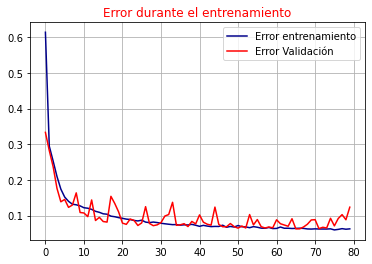

In [19]:
#Graficamos los resultados
error=history.history['loss']
exac=history.history['val_loss']
 
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

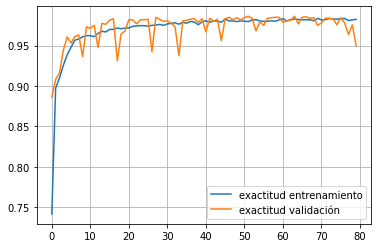

In [20]:
plt.plot(history.history['accuracy'],label='exactitud entrenamiento')
plt.plot(history.history['val_accuracy'],label='exactitud validación')
plt.legend()
plt.grid()

##### Ahora vamos a probar con el conjunto que reservamos para hacer predicciones

In [21]:
model.evaluate(X_pred,Y_pred)

63/63 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9555


[0.1353365182876587, 0.9555000066757202]

In [22]:
def plot_cm(Y_reales,Y_predichos, labels, porcentaje=False):
    #Generamos la matriz de confusión a partir de los dos arreglos
    matrix = sklearn.metrics.confusion_matrix(Y_reales.argmax(axis=1), Y_predichos.argmax(axis=1))
    
    plt.title("Matriz de confusión")
    #Aquí se divie si la queremos en porcentaje o en números
    if porcentaje==False: ax = cns.heatmap(matrix, annot=True, cmap="OrRd", cbar_kws={'label': 'Escala'})
    if porcentaje==True: ax = cns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%',
                                          cmap='OrRd', cbar_kws={'label': 'Escala'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(xlabel="Valores verdaderos", ylabel="Valores predichos")

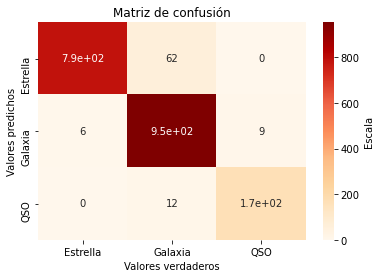

In [23]:
y_test=model.predict(X_pred)
labels=['Estrella','Galaxia','QSO']
plot_cm(Y_pred,y_test, labels, porcentaje=False)